In [1]:
import numpy as np
# common matplotlib shorthands
import matplotlib.pyplot as plt



In [2]:
!pwd

/filer/z-sv-pool08/g/GDuckeck/kurs_repo/ml


In [3]:
data = np.loadtxt('rohr1.dat')

In [4]:
len(data)

1115

In [6]:
print (data.mean(), data.std())

-36.453228699551566 7.937052370863571


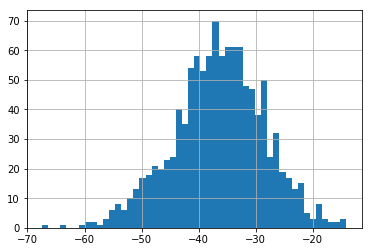

In [9]:
plt.hist(data, 50)
plt.grid(True);

In [10]:
x,y = np.loadtxt('rohr2.dat',unpack=True)

In [11]:
np.loadtxt?

In [13]:
d = np.loadtxt('rohr2.dat')

In [14]:
d.shape

(1115, 2)

In [16]:
d.T

array([[-48.03, -23.04, -40.47, ..., -35.19, -35.55, -30.04],
       [ 21.7 ,  38.2 ,  16.2 , ...,  16.3 ,  10.5 ,  15.7 ]])

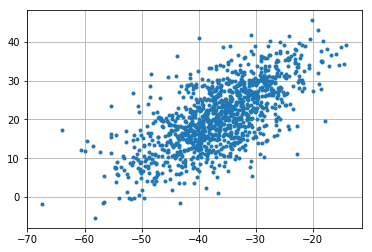

In [18]:
plt.plot(x,y,'.')
plt.grid(True);

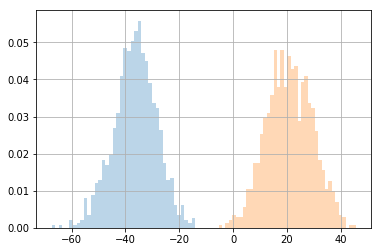

In [20]:
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x, **kwargs)
plt.hist(y, **kwargs)
plt.grid(True);

In [26]:
dataff=np.loadtxt('faithful.csv',delimiter=',',skiprows=1)
#dataff=np.loadtxt('faithful.csv',delimiter=',')


In [23]:
dataff.shape

(272, 3)

In [24]:
dataff

array([[  1.   ,   3.6  ,  79.   ],
       [  2.   ,   1.8  ,  54.   ],
       [  3.   ,   3.333,  74.   ],
       [  4.   ,   2.283,  62.   ],
       [  5.   ,   4.533,  85.   ],
       [  6.   ,   2.883,  55.   ],
       [  7.   ,   4.7  ,  88.   ],
       [  8.   ,   3.6  ,  85.   ],
       [  9.   ,   1.95 ,  51.   ],
       [ 10.   ,   4.35 ,  85.   ],
       [ 11.   ,   1.833,  54.   ],
       [ 12.   ,   3.917,  84.   ],
       [ 13.   ,   4.2  ,  78.   ],
       [ 14.   ,   1.75 ,  47.   ],
       [ 15.   ,   4.7  ,  83.   ],
       [ 16.   ,   2.167,  52.   ],
       [ 17.   ,   1.75 ,  62.   ],
       [ 18.   ,   4.8  ,  84.   ],
       [ 19.   ,   1.6  ,  52.   ],
       [ 20.   ,   4.25 ,  79.   ],
       [ 21.   ,   1.8  ,  51.   ],
       [ 22.   ,   1.75 ,  47.   ],
       [ 23.   ,   3.45 ,  78.   ],
       [ 24.   ,   3.067,  69.   ],
       [ 25.   ,   4.533,  74.   ],
       [ 26.   ,   3.6  ,  83.   ],
       [ 27.   ,   1.967,  55.   ],
       [ 28.   ,   4.083,  7

In [28]:
dataff[:,2]

array([79., 54., 74., 62., 85., 55., 88., 85., 51., 85., 54., 84., 78.,
       47., 83., 52., 62., 84., 52., 79., 51., 47., 78., 69., 74., 83.,
       55., 76., 78., 79., 73., 77., 66., 80., 74., 52., 48., 80., 59.,
       90., 80., 58., 84., 58., 73., 83., 64., 53., 82., 59., 75., 90.,
       54., 80., 54., 83., 71., 64., 77., 81., 59., 84., 48., 82., 60.,
       92., 78., 78., 65., 73., 82., 56., 79., 71., 62., 76., 60., 78.,
       76., 83., 75., 82., 70., 65., 73., 88., 76., 80., 48., 86., 60.,
       90., 50., 78., 63., 72., 84., 75., 51., 82., 62., 88., 49., 83.,
       81., 47., 84., 52., 86., 81., 75., 59., 89., 79., 59., 81., 50.,
       85., 59., 87., 53., 69., 77., 56., 88., 81., 45., 82., 55., 90.,
       45., 83., 56., 89., 46., 82., 51., 86., 53., 79., 81., 60., 82.,
       77., 76., 59., 80., 49., 96., 53., 77., 77., 65., 81., 71., 70.,
       81., 93., 53., 89., 45., 86., 58., 78., 66., 76., 63., 88., 52.,
       93., 49., 57., 77., 68., 81., 81., 73., 50., 85., 74., 55

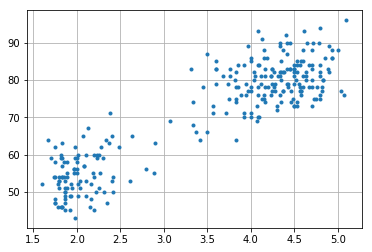

In [30]:
plt.plot(dataff[:,1],dataff[:,2],'.')
plt.grid(True);

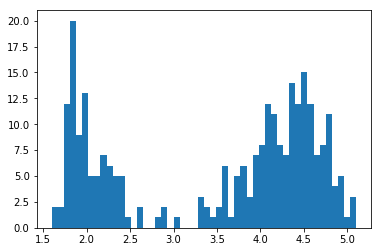

In [33]:
plt.hist(dataff[:,1],bins=50);

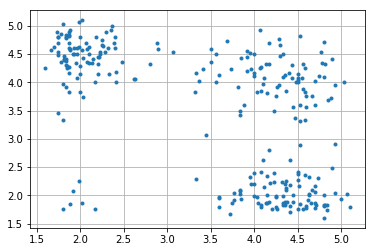

In [34]:
plt.plot(dataff[:-1,1],dataff[1:,1],'.')
plt.grid(True);

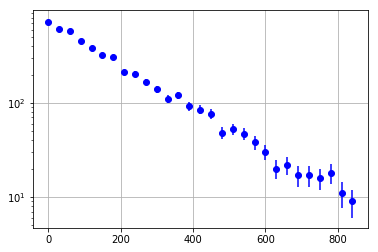

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Input data

counts = [728, 612, 581, 460, 381, 324, 305, 211, 203, 166, 139, 
          110, 120, 92, 85, 77, 48, 53, 47, 38, 30, 20, 22, 17, 17, 16, 18, 11, 9]


n = len(counts)
#isi = np.random.exponential(0.1 , size=n)
dt = 30.
tmax = dt*n 
x = np.arange(0 , tmax, dt)
dcounts = np.sqrt(counts) # stat error

plt.errorbar(x, counts, dcounts, fmt='ob')
plt.yscale('log')
plt.grid(True)

In [40]:

#
# Function to fit
# x - independent variable
# p0, p1 - parameters
fitfunc = lambda x, p0, p1 : p1 * np.exp (- x /p0 ) 

# Initial values for fit parameters
pinit = np.array([ 100, 200. ])

out,cov=curve_fit(fitfunc,x+dt/2, counts, pinit, dcounts)


In [41]:
out

array([187.74755211, 793.97811457])

 Slope: 187.7476 +-   2.9148 
Height: 793.9781 +-  15.9970 


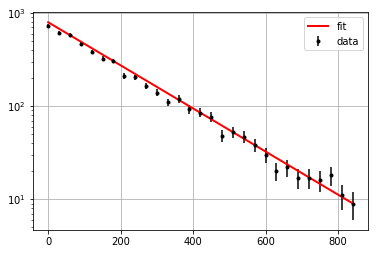

In [42]:
#print ('Fit-result :', out)
parnames = ['Slope','Height']
for i in range(2):
    print ("%6s: %7.4f +-  %7.4f " % ( parnames[i], out[i], 
                                      np.sqrt(cov[i][i])))

l1='data'

plt.errorbar(x, counts, dcounts, fmt='k.',label=l1)
plt.yscale('log')
plt.grid(True)

l2='fit'
plt.plot(x,fitfunc(x,out[0],out[1]),'r-',lw=2,label=l2)

plt.legend()
plt.yscale('log')
